<a href="https://colab.research.google.com/github/ratna-sri/Bike-Sharing-Demand-Prediction---ML-Regression/blob/main/Bike_Sharing_Demand_Prediction_Regression_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Seoul Bike Sharing Demand Prediction







##### **Project Type**    - Regression
##### **Contribution**    - Individual
**Name** - Ratnasri Bolimera


# **Project Summary -**

**The Seoul Bike Sharing Demand Prediction project is a great example of the typical process for a data science project. It involves five key stages: defining a problem, data processing, modeling, evaluation, and deployment**.

The first step in this project was to define the problem. The objective was to predict the demand for shared bikes in Seoul based on various features such as temperature, rainfall, season, and snowfall. To achieve this objective, the project involved a thorough understanding of the data by examining its properties, including its size, shape, and quality.

**Data processing is the next step, and it involves cleaning and preparing the data for modeling. In this project**, the data was wrangled, and new features were engineered. One example is the creation of new columns such as month and weekdays. These features were added to the dataset to provide a deeper understanding of how various factors influence bike rentals in Seoul.

**After data processing, the project involved Exploratory Data Analysis (EDA) to gain further insight into the data**. The EDA stage helped to identify relationships between the dependent variable, 'Rental Bike Count,' and other independent variables such as temperature, rainfall, and functioning day.

One of the significant findings from the EDA stage is that rented bikes are less used in winters than summers. Also, functioning day is a crucial factor in determining the number of bikes rented. By checking the correlations, the team discovered that some columns contained outliers that could affect the models' performance. Therefore, they took steps to address the issue by removing the outliers.

**The next step was to split the dataset into training and testing sets. Our team has used a 0.20 ratio to ensure the model's performance is not overfitted**. They applied multiple linear regression, ridge regression, lasso regression, elastic net, polynomial regression, decision tree, and random forest.

To evaluate the model's performance, the team used adjusted R2 and RMSE as evaluation metrics. The results showed that the Random Forest model outperformed other models. Random Forest had the highest adjusted R2 score, indicating that it was the best model to deploy.

**In summary, the Seoul Bike Sharing Demand Prediction project demonstrates the importance of following best practices in data science projects. Our team thoroughly understood the problem and the data and applied various data processing techniques, including feature engineering and data cleaning. We also performed EDA, model evaluation, and selection, and ensured transparency and interpretability of the model by using model explainability.**

# **GitHub Link -**

GitHub Link :- https://github.com/ratna-sri/Bike-Sharing-Demand-Prediction---ML-Regression


# **Problem Statement**


Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


> My goal is to develop a model that is highly accurate, with a low mean absolute error and a high R-squared value. The model should also be able to provide insights into the factors that most impact bike demand, helping the bike sharing company to make data-driven decisions about how to optimize their operations.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [107]:
# Import Libraries
# for data visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# For manipulating date column
from datetime import datetime
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MultiLabelBinarizer

#importing various machine learning models:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor


from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

# Import different metrics from sci-kit libraries for model evaluation.
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import log_loss

# Import warnings library
import warnings
warnings.filterwarnings('ignore')




### Dataset Loading

In [108]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [109]:
# Load Dataset

bike_df = pd.read_csv('/content/drive/MyDrive/Almabetter /Projects/Regression/SeoulBikeData.csv',encoding='ISO-8859-1')

### Dataset First View

In [110]:
# Dataset First Look
bike_df

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01-12-2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01-12-2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01-12-2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01-12-2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01-12-2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30-11-2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30-11-2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30-11-2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30-11-2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


### Dataset Rows & Columns count

In [111]:
# Dataset Rows & Columns count
print(f'Dataset has {bike_df.shape[0]} rows and {bike_df.shape[1]} columns')


Dataset has 8760 rows and 14 columns


In [112]:
# Columns of the dataset
print("Columns of the dataset:")
bike_df.columns

Columns of the dataset:


Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

### Dataset Information

In [113]:
# Dataset Info
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

#### Duplicate Values

In [114]:
# Dataset Duplicate Value Count
bike_duplicate_values = len(bike_df[bike_df.duplicated()])
print(f"Total number of duplicate values in the Dataset are:",bike_duplicate_values)

Total number of duplicate values in the Dataset are: 0


#### Missing Values/Null Values

In [115]:
# Missing Values/Null Values Count
bike_df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

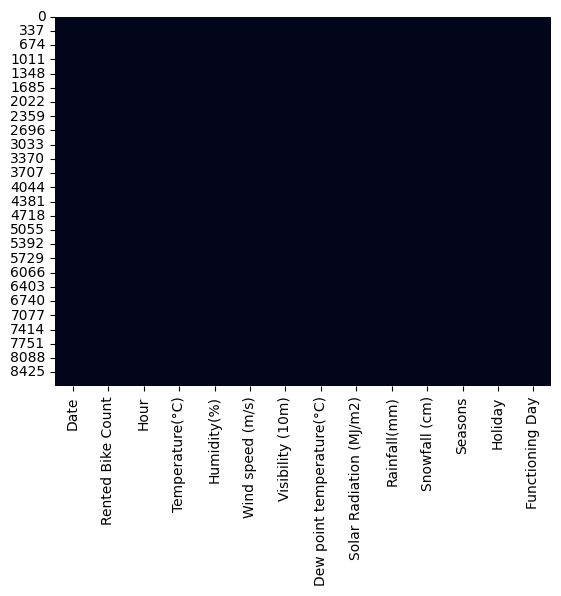

In [116]:
# Visualizing the missing values
# Checking null valuses by plotting heatmap
sns.heatmap(bike_df.isnull(), cbar=False);

### What did you know about your dataset?

* There are 8760 rows and 14 columns
* There are no null values.
* Dataset has all unique values i.e., there is no duplicate, which means data is free from bias as duplicates which can cause problems in downstream analysis, such as biasing results or making it difficult to accurately summarize the data.
* Date has some object data types, it should be datetime data type.

## ***2. Understanding Your Variables***

In [117]:
# Dataset Columns
bike_df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [118]:
# Dataset Describe
bike_df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


### Variables Description

**Description of Variables:**

* ### **Date** : *Representing the date of the day, with data type string*
* ### **Rented Bike Count** : *Denoting the hourly number of rented bikes, an integer serving as the dependent variable*
* ### **Hour** : *Indicating the hour of the day, with a range of 0 to 23, and data type integer*
* ### **Temperature (°C)** : *Displaying the temperature in Celsius, with data type float*
* ### **Humidity (%)** : *Reflecting the percentage of humidity in the air, an integer*
* ### **Wind speed (m/s)** : *Measuring the speed of wind in meters per second, with data type float*
* ### **Visibility (10m)** : *Showing the visibility in meters, with data type integer*
* ### **Dew point temperature (°C)** : *Representing the temperature at which water begins to condense from the air, with data type float*
* ### **Solar Radiation (MJ/m2)** : *Illustrating the electromagnetic radiation from the Sun, with data type float*
* ### **Rainfall (mm)** : *Quantifying the amount of rainfall in millimeters, with data type float*
* ### **Snowfall (cm)** : *Indicating the amount of snowfall in centimeters,*
* ### **Seasons** - *The time of year, categorized as a string value*
* ### **Holiday** - *Indicates whether the day is a holiday or not, represented as a string value*
* ### **Functioning Day** - *Determines if the day is functional or not, represented as a string value*

### Check Unique Values for each variable.

In [119]:
# Check Unique Values for each variable.
bike_df.nunique()

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

In [120]:
pd.set_option('display.max_colwidth',None)
bike_df.apply(lambda col:col.unique())

Date                         [01-12-2017, 02-12-2017, 03-12-2017, 04-12-2017, 05-12-2017, 06-12-2017, 07-12-2017, 08-12-2017, 09-12-2017, 10-12-2017, 11-12-2017, 12-12-2017, 13-12-2017, 14-12-2017, 15-12-2017, 16-12-2017, 17-12-2017, 18-12-2017, 19-12-2017, 20-12-2017, 21-12-2017, 22-12-2017, 23-12-2017, 24-12-2017, 25-12-2017, 26-12-2017, 27-12-2017, 28-12-2017, 29-12-2017, 30-12-2017, 31-12-2017, 01-01-2018, 02-01-2018, 03-01-2018, 04-01-2018, 05-01-2018, 06-01-2018, 07-01-2018, 08-01-2018, 09-01-2018, 10-01-2018, 11-01-2018, 12-01-2018, 13-01-2018, 14-01-2018, 15-01-2018, 16-01-2018, 17-01-2018, 18-01-2018, 19-01-2018, 20-01-2018, 21-01-2018, 22-01-2018, 23-01-2018, 24-01-2018, 25-01-2018, 26-01-2018, 27-01-2018, 28-01-2018, 29-01-2018, 30-01-2018, 31-01-2018, 01-02-2018, 02-02-2018, 03-02-2018, 04-02-2018, 05-02-2018, 06-02-2018, 07-02-2018, 08-02-2018, 09-02-2018, 10-02-2018, 11-02-2018, 12-02-2018, 13-02-2018, 14-02-2018, 15-02-2018, 16-02-2018, 17-02-2018, 18-02-2018, 19-02-2018

## 3. ***Data Wrangling***

### Data Wrangling Code

In [121]:
# Renaming the Columns
bike_df = bike_df.rename(columns={'Date':'date','Rented Bike Count': 'rented_bike_count', 'Hour':'hour',
                    'Temperature(°C)':'temp', 'Humidity(%)':'humidity',
                    'Wind speed (m/s)': 'wind_speed', 'Visibility (10m)': 'visibility',
                    'Dew point temperature(°C)':'dew_point_temp',
                    'Solar Radiation (MJ/m2)': 'solar_radiation', 'Rainfall(mm)': 'rainfall',
                    'Snowfall (cm)':'snowfall', 'Seasons':'seasons',
                    'Holiday':'holiday', 'Functioning Day':'func_day'})

* ***Python read "Date" column as a object type basically it reads as a string, as the date column is very important to analyze the users behaviour so we need to convert it into datetime format then we split it into 3 column i.e 'year', 'month', 'day'as a category data type.***

In [122]:
# Changing the "date" column into three "year","month","day" column
bike_df['date'] = bike_df['date'].str.replace('-', '/')
bike_df['date'] = bike_df['date'].apply(lambda x: dt.datetime.strptime(x, "%d/%m/%Y"))

In [123]:
bike_df['year'] = bike_df['date'].dt.year
bike_df['month'] = bike_df['date'].dt.month
bike_df['day'] = bike_df['date'].dt.day_name()

In [124]:
#creating a new column of "weekdays_weekend" and drop the column "date","day","year"
bike_df['weekdays_weekend']=bike_df['day'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0 )
bike_df=bike_df.drop(columns=['date','day','year'],axis=1)

* ***So we convert the "date" column into 3 different column i.e "year","month","day".***
* ***The "year" column in our data set is basically contain the 2 unique number contains the details of from 2017 december to 2018 november so if i consider this is a one year then we don't need the "year" column so we drop it***.
* ***The other column "day", it contains the details about the each day of the month, for our relevence we don't need each day of each month data but we need the data about, if a day is a weekday or a weekend so we convert it into this format and drop the "day" column***.

In [125]:
bike_df.head()

,rented_bike_count,hour,temp,humidity,wind_speed,visibility,dew_point_temp,solar_radiation,rainfall,snowfall,seasons,holiday,func_day,month,weekdays_weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0


In [126]:
bike_df['weekdays_weekend'].value_counts()

weekdays_weekend
0    6264
1    2496
Name: count, dtype: int64

* ***As "Hour","month","weekdays_weekend" column are show as a integer data type but actually it is a category data tyepe. so we need to change this data tyepe if we not then, while doing the further anlysis and correleted with this then the values are not actually true so we can mislead by this.***

In [127]:
#Change the int64 column into catagory column
cols=['hour','month','weekdays_weekend']
for col in cols:
  bike_df[col]=bike_df[col].astype('category')

In [128]:
#let's check the result of data type
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   rented_bike_count  8760 non-null   int64   
 1   hour               8760 non-null   category
 2   temp               8760 non-null   float64 
 3   humidity           8760 non-null   int64   
 4   wind_speed         8760 non-null   float64 
 5   visibility         8760 non-null   int64   
 6   dew_point_temp     8760 non-null   float64 
 7   solar_radiation    8760 non-null   float64 
 8   rainfall           8760 non-null   float64 
 9   snowfall           8760 non-null   float64 
 10  seasons            8760 non-null   object  
 11  holiday            8760 non-null   object  
 12  func_day           8760 non-null   object  
 13  month              8760 non-null   category
 14  weekdays_weekend   8760 non-null   category
dtypes: category(3), float64(6), int64(3), object(3)
memory 

In [129]:
bike_df.columns

Index(['rented_bike_count', 'hour', 'temp', 'humidity', 'wind_speed',
       'visibility', 'dew_point_temp', 'solar_radiation', 'rainfall',
       'snowfall', 'seasons', 'holiday', 'func_day', 'month',
       'weekdays_weekend'],
      dtype='object')

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

## **Analysis of Categorical Data**

#### Chart - 1

[Text(0.5, 1.0, 'Count of Rented bikes acording to Month')]

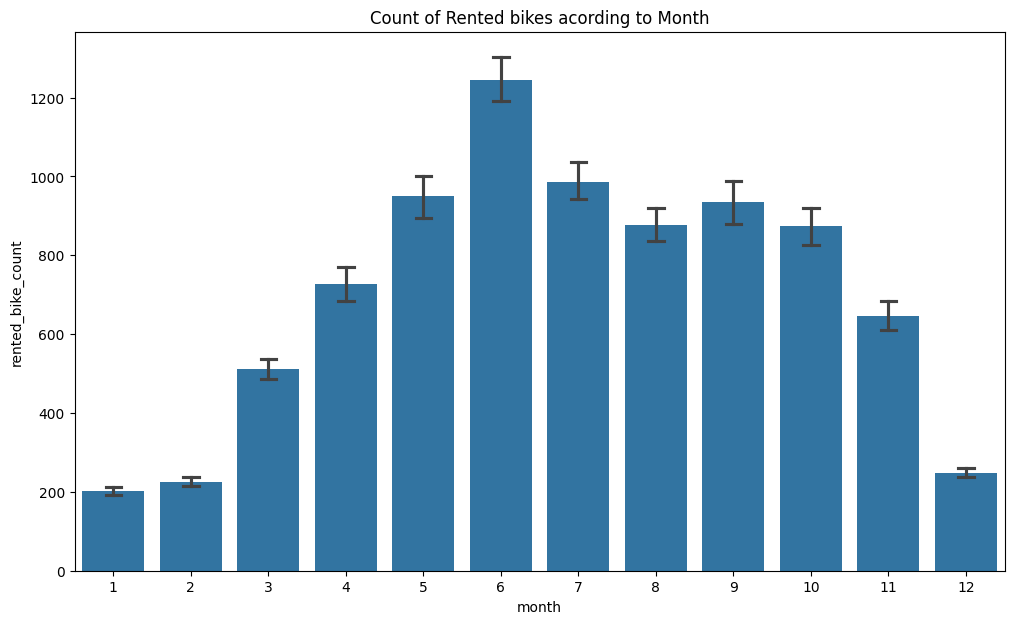

In [130]:
# Month
fig,ax=plt.subplots(figsize=(12,7))
sns.barplot(data=bike_df,x='month',y='rented_bike_count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Month')

##### 1. Why did you pick the specific chart?

**The above chart showing the count of rented bike counts according to Month**












##### 2. What is/are the insight(s) found from the chart?

* ***From the above bar plot we can clearly say that, from the month 5 to 10
 (May - October) the demand of the rented bike is high as compare to other months.These months came inside the summer season.***

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Yes. If the rented bike availability increses in summer season, the revenue
will become high.**





#### Chart - 2

[Text(0.5, 1.0, 'Count of Rented bikes acording to weekdays_weekend')]

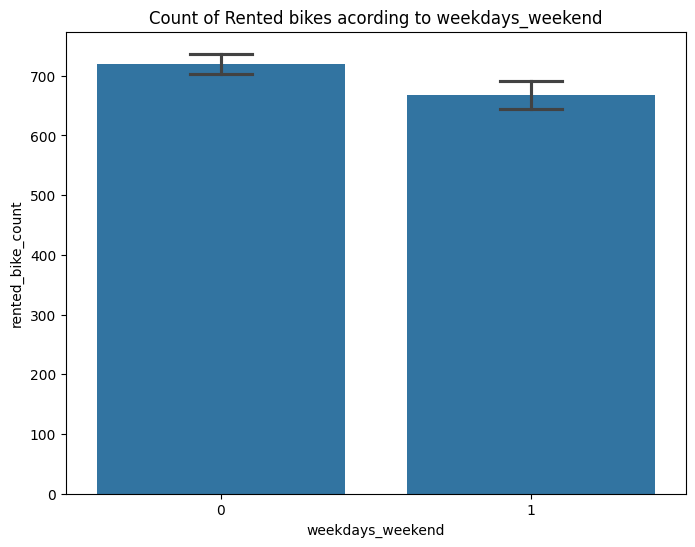

In [131]:
# Weekdays_Weekend
fig,ax=plt.subplots(figsize=(8,6))
sns.barplot(data=bike_df,x='weekdays_weekend',y='rented_bike_count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to weekdays_weekend')

[Text(0.5, 1.0, 'Count of Rented bikes acording to weekdays_weekend ')]

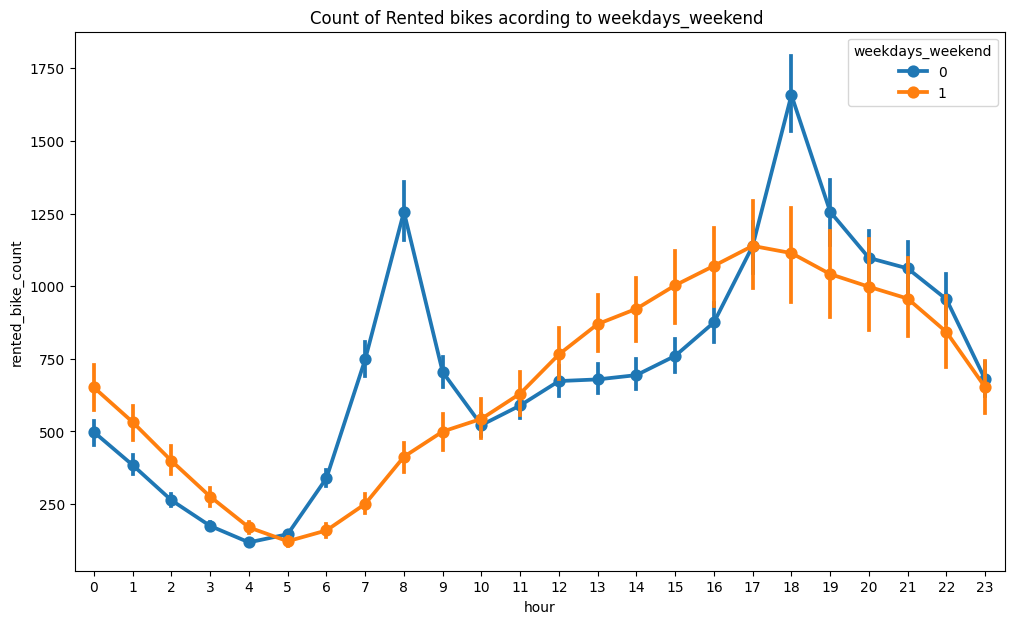

In [132]:
# According to Weekdays_weekend
fig,ax=plt.subplots(figsize=(12,7))
sns.pointplot(data=bike_df,x='hour',y='rented_bike_count',hue='weekdays_weekend',ax=ax)
ax.set(title='Count of Rented bikes acording to weekdays_weekend ')

##### 1. Why did you pick the specific chart?

**The above bar plot and point chart is showing the rented bike count according to weekdays_weekend.**


##### 2. What is/are the insight(s) found from the chart?

* ***From the above point plot and bar plot we can say that, in the week days which represent in blue colur show that the demand of the bike higher because of the office.***
***Peak Time For the rented bike bookings are from 7 am-9 am and 5 pm-7 pm ***
***The orange colur represent the weekend days, and it show that the demand of rented bikes are very low specially in the morning hour but in the evening hours from 4 pm to 8 pm the demand slightly increases.***   


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes.

#### Chart - 3

[Text(0.5, 1.0, 'Count of Rented bikes acording to Hour ')]

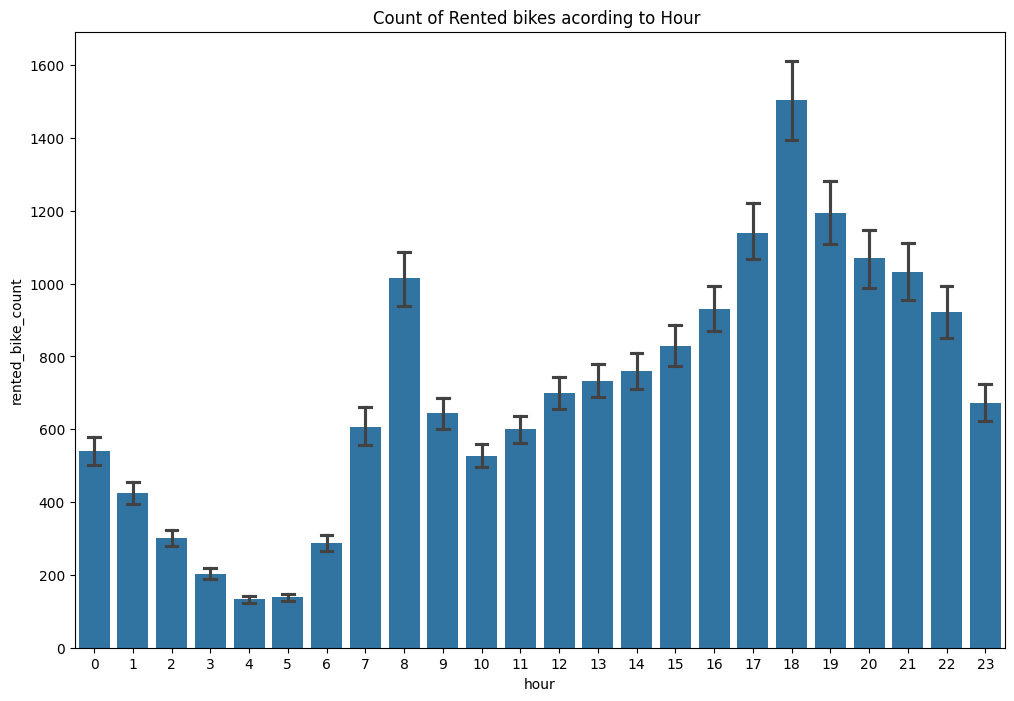

In [133]:
# Hour
fig,ax=plt.subplots(figsize=(12,8))
sns.barplot(data=bike_df,x='hour',y='rented_bike_count',ax=ax,capsize=.3)
ax.set(title='Count of Rented bikes acording to Hour ')

##### 1. Why did you pick the specific chart?

**The above bar plot showing the use of rented bikes according to hour and the data is taken from all over the year.**

##### 2. What is/are the insight(s) found from the chart?

**From the above plot we can say that, generally use of rented bikes are high at the time of working hours which is from 7 am- 9 am and 4 pm- 9 pm.**

#### Chart - 4

[Text(0.5, 1.0, 'Count of Rented bikes acording to Seasons ')]

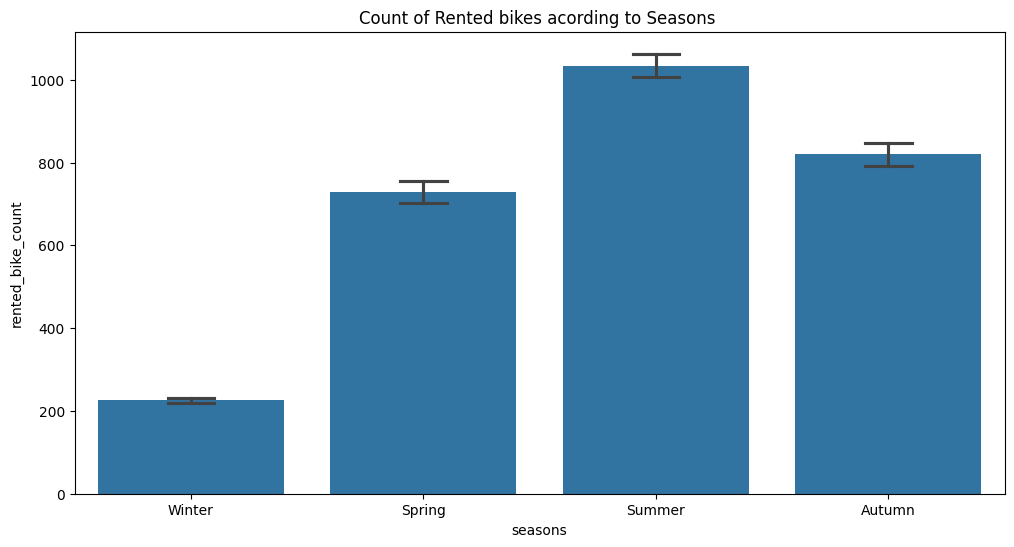

In [134]:
# Count of Rented bikes according to Seasons
fig,ax=plt.subplots(figsize=(12,6))
sns.barplot(data=bike_df,x='seasons',y='rented_bike_count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Seasons ')


[Text(0.5, 1.0, 'Count of Rented bikes acording to seasons ')]

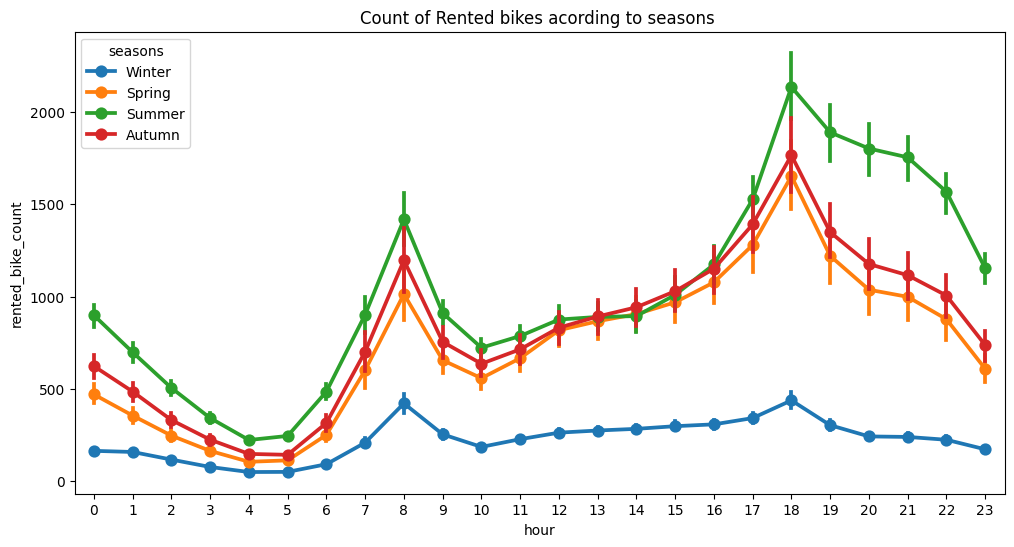

In [135]:
fig,ax=plt.subplots(figsize=(12,6))
sns.pointplot(data=bike_df,x='hour',y='rented_bike_count',hue='seasons',ax=ax)
ax.set(title='Count of Rented bikes acording to seasons ')

##### 1. Why did you pick the specific chart?

**The above barplot and point plot is showing count of rented bikes according to seasons.**

##### 2. What is/are the insight(s) found from the chart?

* ***In summer season the use of rented bikes is high and the peak time is 7am-9am and 5pm-7pm.***
* ***In winter season the use of rented bike is very low maybe because of snowfall, fog, cold etc.***

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Yes. If the more availabilty of bikes in summer season will increase the business will help to get more revenue.**

#### Chart - 5

[Text(0.5, 1.0, 'Count of Rented bikes acording to Functioning Day ')]

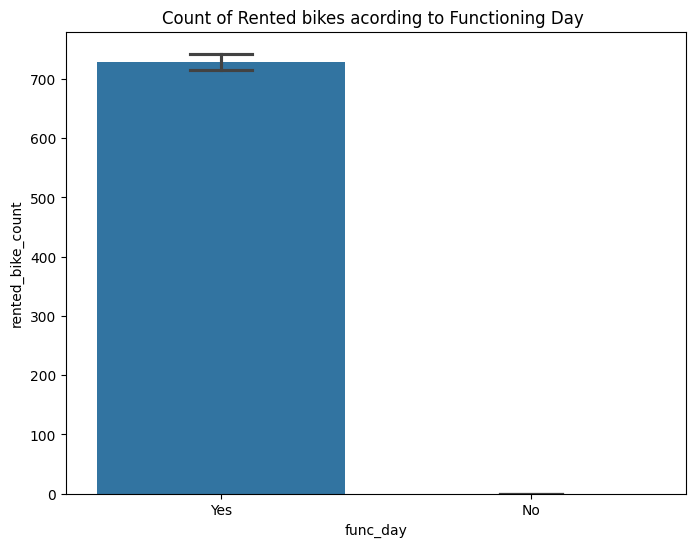

In [136]:
#  Functioning Day
fig,ax=plt.subplots(figsize=(8,6))
sns.barplot(data=bike_df,x='func_day',y='rented_bike_count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Functioning Day ')

[Text(0.5, 1.0, 'Count of Rented bikes acording to Functioning Day ')]

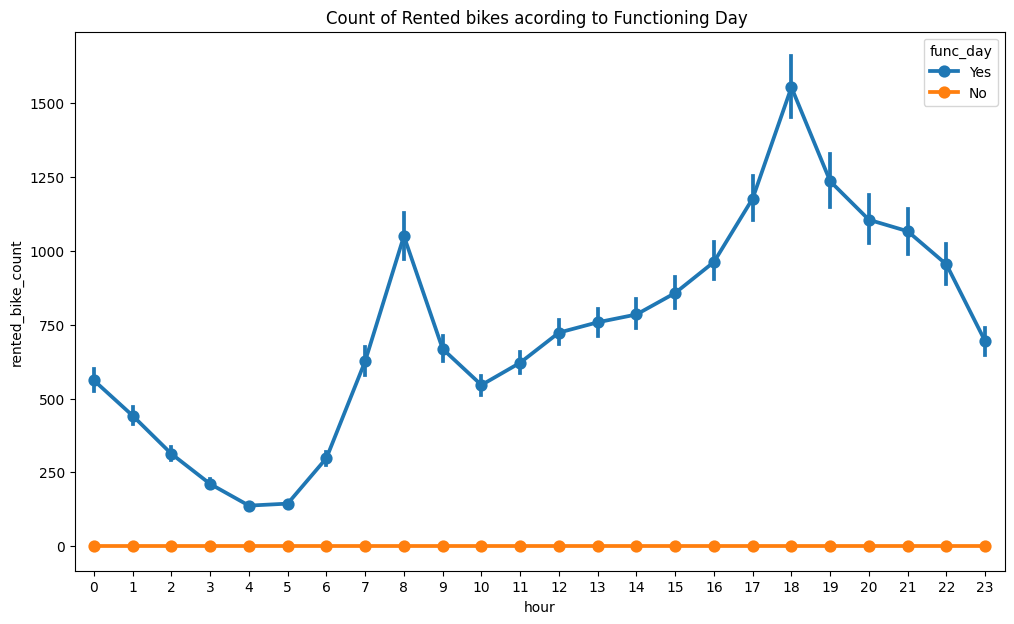

In [137]:
fig,ax=plt.subplots(figsize=(12,7))
sns.pointplot(data=bike_df,x='hour',y='rented_bike_count',hue='func_day',ax=ax)
ax.set(title='Count of Rented bikes acording to Functioning Day ')

##### 1. Why did you pick the specific chart?

**The above barplot and pointplot shows the count of rented bikes according to Functioning day.**

##### 2. What is/are the insight(s) found from the chart?

**From the above chart, we can clearly say that no one is using the rented bikes in No functioning day.**

#### Chart - 6

[Text(0.5, 1.0, 'Count of Rented bikes acording to Holiday ')]

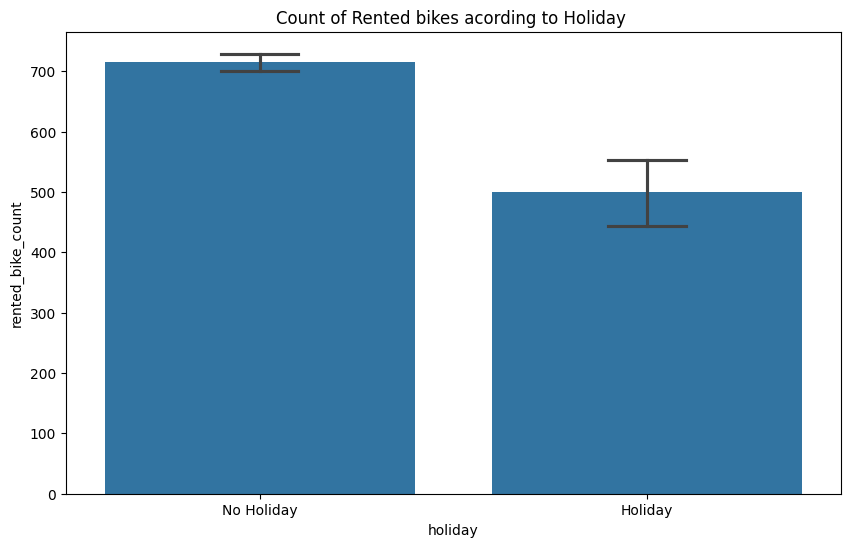

In [138]:
# Holiday
fig,ax=plt.subplots(figsize=(10,6))
sns.barplot(data=bike_df,x='holiday',y='rented_bike_count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Holiday ')

[Text(0.5, 1.0, 'Count of Rented bikes acording to Holiday ')]

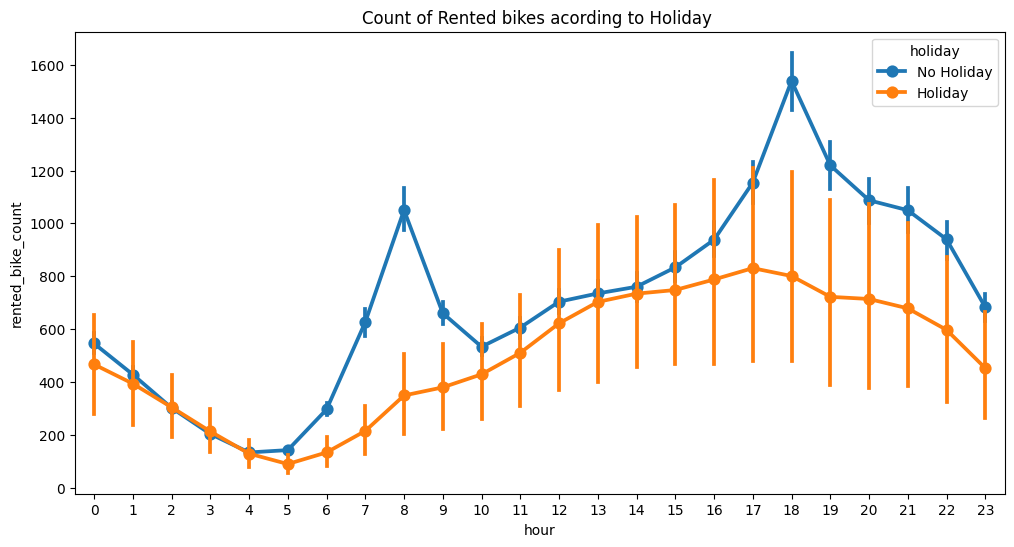

In [139]:
fig,ax=plt.subplots(figsize=(12,6))
sns.pointplot(data=bike_df,x='hour',y='rented_bike_count',hue='holiday',ax=ax)
ax.set(title='Count of Rented bikes acording to Holiday ')

##### 1. Why did you pick the specific chart?

**The above barplot and point plot showing the count of rented bikes according to Holiday.**

##### 2. What is/are the insight(s) found from the chart?

**By using the above plots we can say that less booking were happened in no Holiday, bookings were happened at 2 pm - 9 pm.**

## **Analysis of Numerical Data**

In [140]:
 # Numerical Features From dataframe
numeric_features= bike_df.select_dtypes(exclude=['object','category'])
numeric_features


,rented_bike_count,temp,humidity,wind_speed,visibility,dew_point_temp,solar_radiation,rainfall,snowfall
0,254,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0
1,204,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0
2,173,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0
3,107,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0
4,78,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
8755,1003,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0
8756,764,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0
8757,694,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0
8758,712,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0


#### Chart - 7

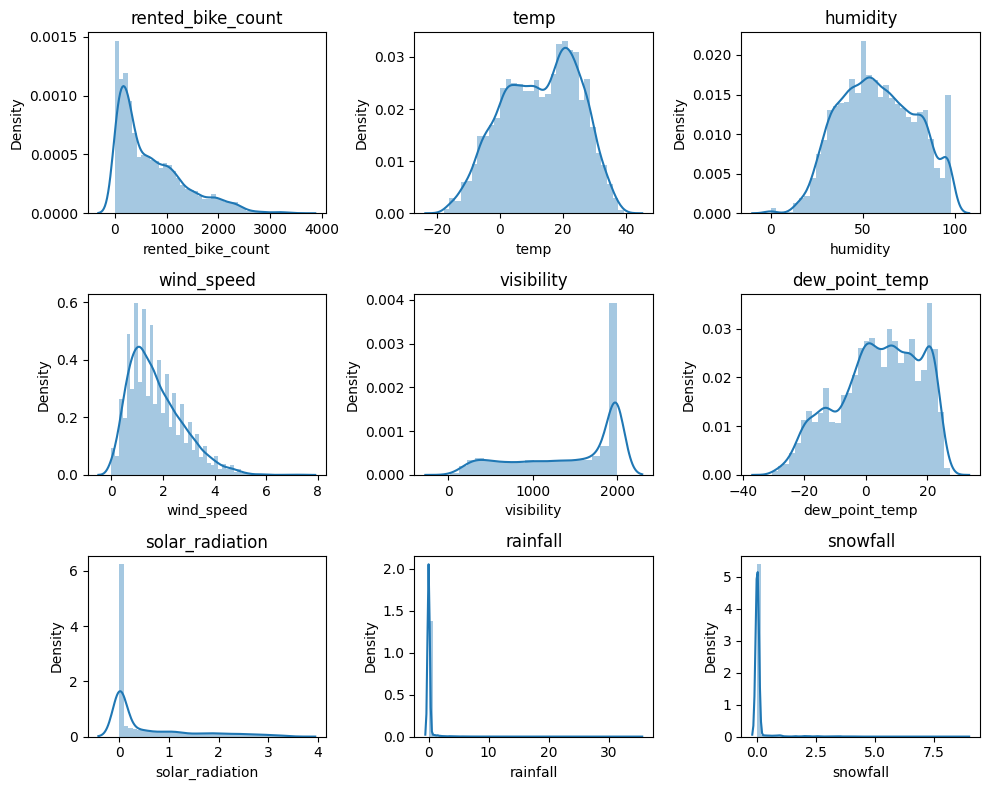

In [141]:
# displots to analyze the distribution of all numeric features
n=1
plt.figure(figsize=(10,8))
for i in numeric_features.columns:
  plt.subplot(3,3,n)
  n=n+1
  sns.distplot(bike_df[i])
  plt.title(i)
  plt.tight_layout()

##### 1. Why did you pick the specific chart?

**The above distplots are showing the variation in data distribution.**

##### 2. What is/are the insight(s) found from the chart?

**From the above Distplots, some of the variables are**

* **Right Skewed which are Rented Bike Count (Its also our Dependent variable),
Wind speed (m/s),
Solar Radiation (MJ/m2),
Rainfall(mm),
Snowfall (cm).**

*  **Left skewed which are Visibility (10m),
Dew point temperature(°C).**

## **Chart - 8** Regression Plot


* ***The regression plots in seaborn are primarily intended to add a visual guide that helps to emphasize patterns in a dataset during exploratory data analyses. Regression plots as the name suggests creates a regression line between 2 parameters and helps to visualize their linear relationships.***

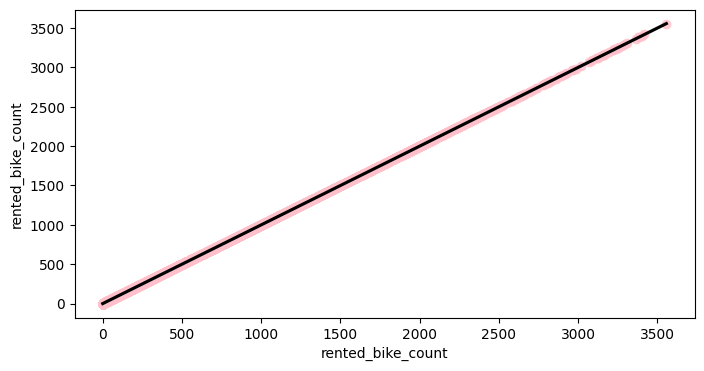

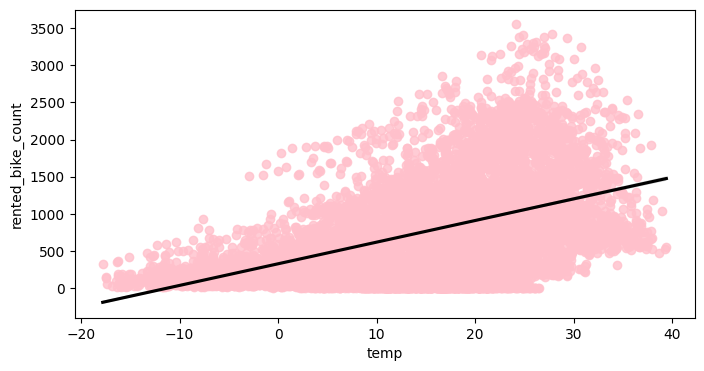

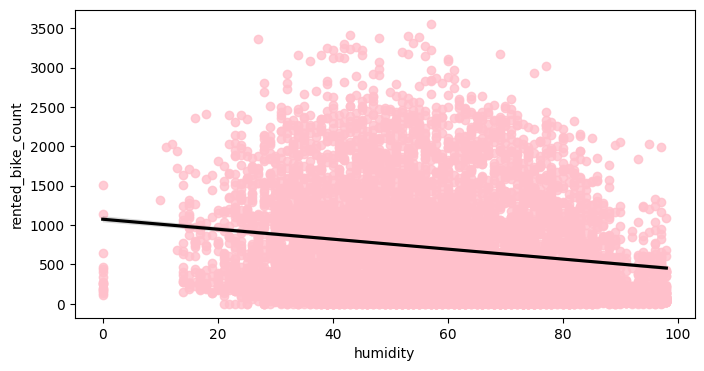

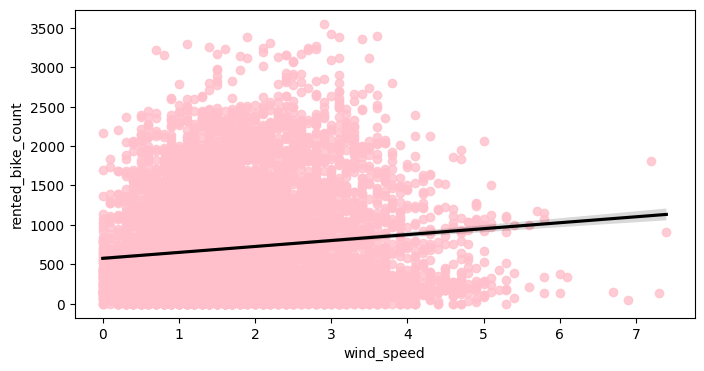

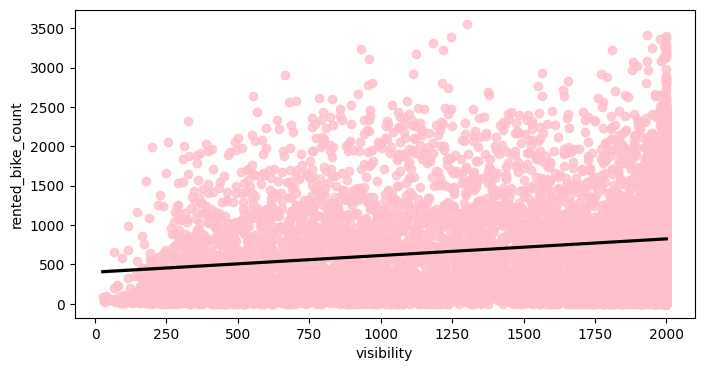

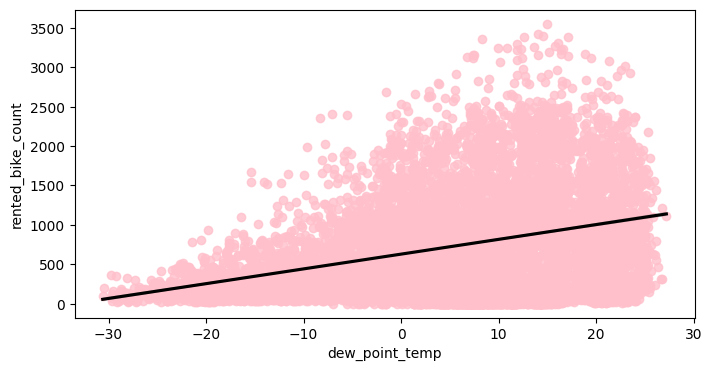

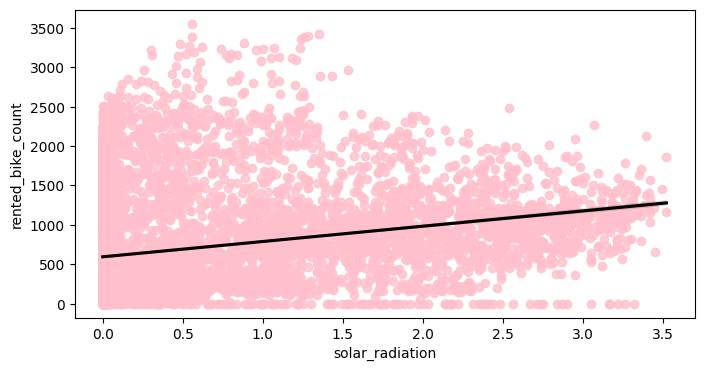

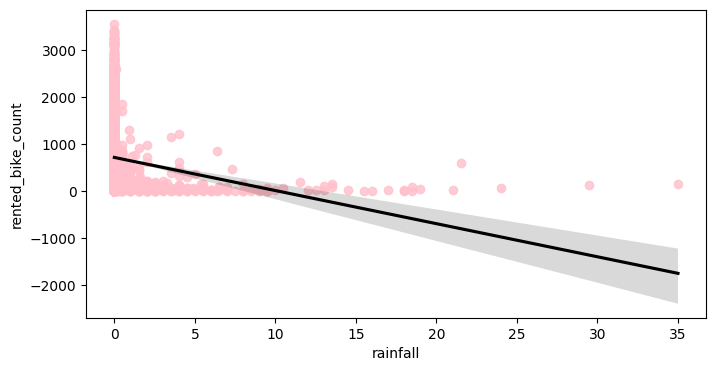

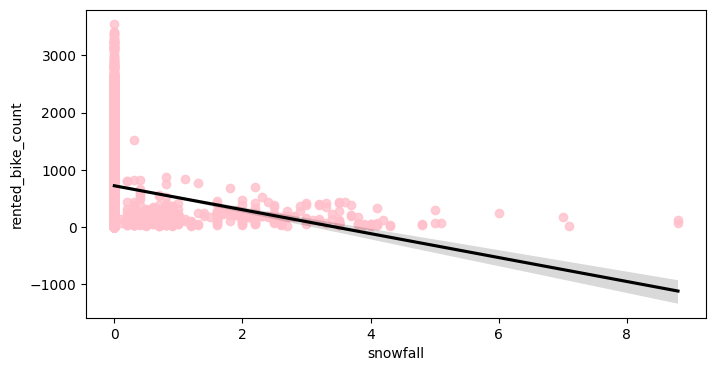

In [142]:
# regression plot for all the numerical features
for col in numeric_features:
  fig,ax=plt.subplots(figsize=(8,4))
  sns.regplot(x=bike_df[col],y=bike_df['rented_bike_count'],scatter_kws={"color": 'pink'}, line_kws={"color": "black"})

##### 1. Why did you pick the specific chart?

* **The above regression plots show the linear relationship between numeric variables and Dependent variable.**

##### 2. What is/are the insight(s) found from the chart?

* ***The columns  'Temperature', 'Wind_speed','Visibility', 'Dew_point_temperature', and 'Solar_Radiation' are positively related to the target variable which means the rented bike count increases with increase of these features.***

* ***'Rainfall','Snowfall','Humidity' these features are negatively related with the target variaable which means the rented bike count decreases when these features increase.***

##  **Correlation Heatmap**

<Axes: >

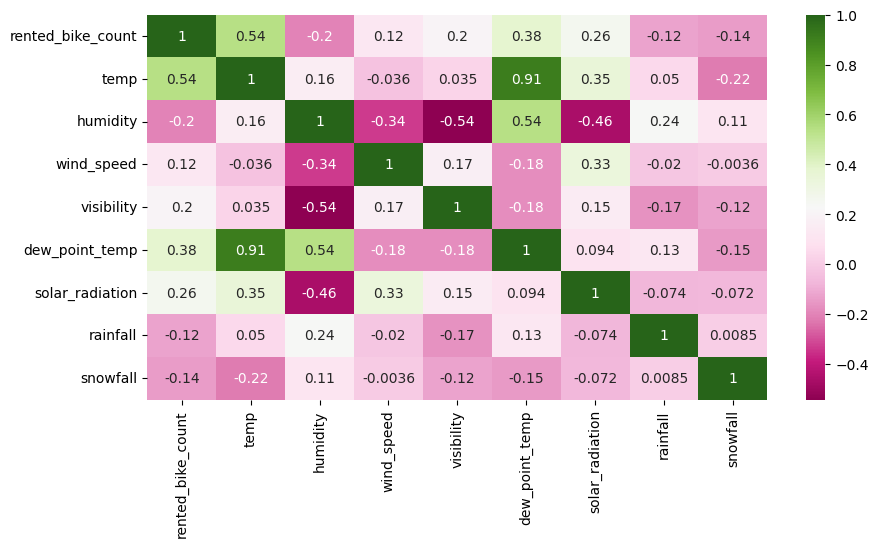

In [143]:
# Correlation Heatmap visualization code
plt.figure(figsize=(10,5))
sns.heatmap(numeric_features.corr(),cmap='PiYG',annot=True)

##### 1. Why did you pick the specific chart?

**The above correlation Heatmap is a type of graphical representation that displays the correlation matrix, which helps to determine the correlation between different variables.**

##### 2. What is/are the insight(s) found from the chart?

**We can observe on the heatmap that on the target variable line, the most positively correlated variables to the rent are**:
* the temperature
* the dew point temperature
* the solar radiation


\
**And most negatively correlated variables are**:
* humidity
* rainfall

* ***From the above correlation heatmap, We say that there is a positive
correlation between columns 'Temperature' and 'Dew point temperature' i.e 0.91 so even if we drop this column then it won't affect the outcome of our analysis. And they have the same variations, so we can drop the column 'Dew point temperature(°C)'.***

In [144]:
# dropping the Dew point temperature column
bike_df=bike_df.drop(['dew_point_temp'],axis=1)
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   rented_bike_count  8760 non-null   int64   
 1   hour               8760 non-null   category
 2   temp               8760 non-null   float64 
 3   humidity           8760 non-null   int64   
 4   wind_speed         8760 non-null   float64 
 5   visibility         8760 non-null   int64   
 6   solar_radiation    8760 non-null   float64 
 7   rainfall           8760 non-null   float64 
 8   snowfall           8760 non-null   float64 
 9   seasons            8760 non-null   object  
 10  holiday            8760 non-null   object  
 11  func_day           8760 non-null   object  
 12  month              8760 non-null   category
 13  weekdays_weekend   8760 non-null   category
dtypes: category(3), float64(5), int64(3), object(3)
memory usage: 779.7+ KB


## ***5. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [145]:
# Handling Missing Values & Missing Value Imputation
bike_df.isnull().sum()

rented_bike_count    0
hour                 0
temp                 0
humidity             0
wind_speed           0
visibility           0
solar_radiation      0
rainfall             0
snowfall             0
seasons              0
holiday              0
func_day             0
month                0
weekdays_weekend     0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

**As we can see there are no missing values in th dataset.**

### 2. Handling Outliers

In [146]:
#Creating a list of columns that can possibly contain outliers
possible_outlier_cols = list(set(bike_df.describe().columns)-{'Rented Bike Count'})
possible_outlier_cols

['rainfall',
 'wind_speed',
 'visibility',
 'solar_radiation',
 'rented_bike_count',
 'snowfall',
 'temp',
 'humidity']

<function matplotlib.pyplot.show(close=None, block=None)>

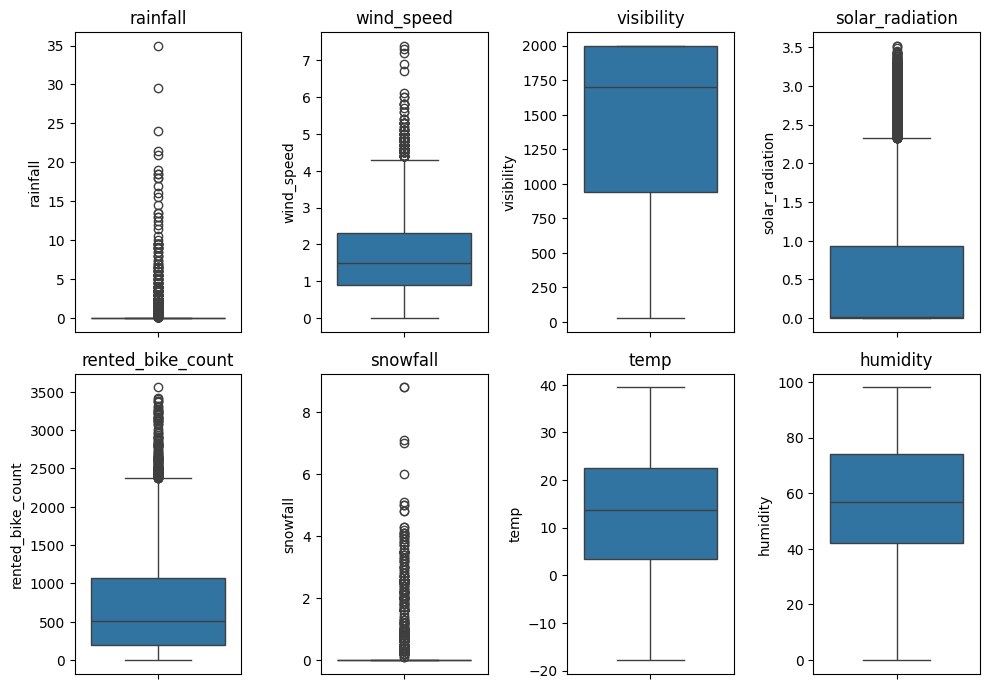

In [147]:
plt.figure(figsize=(10, 7))

for index, item in enumerate(possible_outlier_cols):
    plt.subplot(2,4,index + 1)
    sns.boxplot(y=bike_df[item], orient='h') # Set orient to 'h' for horizontal boxplot
    plt.title(item)

plt.tight_layout()
plt.show

##### What all outlier treatment techniques have you used and why did you use those techniques?

Here we can see that the columns that contain outliers are Rainfall, Snowfall, Windspeed and Solar Radiation.

In [148]:
#Creating a list of columns that contains outliers
outlier_cols = ['rainfall','wind_speed','snowfall','solar_radiation']
outlier_cols

['rainfall', 'wind_speed', 'snowfall', 'solar_radiation']

In [149]:
#Finding the inter-quartile range for the columns with outliers
Q1 = bike_df[outlier_cols].quantile(0.25)
Q3 = bike_df[outlier_cols].quantile(0.75)
IQR = Q3-Q1
IQR

rainfall           0.00
wind_speed         1.40
snowfall           0.00
solar_radiation    0.93
dtype: float64

In [150]:
#Calculating the upper and lower range for outlier removal
upper_range = Q3 + (1.5*IQR)
lower_range = Q1 - (1.5*IQR)

In [151]:
#Detecting and removing the outliers
bike_df[outlier_cols] = bike_df[outlier_cols][~((bike_df[outlier_cols] < lower_range) | (bike_df[outlier_cols] > upper_range))]

In [152]:
#Checking the number of outliers deleted
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   rented_bike_count  8760 non-null   int64   
 1   hour               8760 non-null   category
 2   temp               8760 non-null   float64 
 3   humidity           8760 non-null   int64   
 4   wind_speed         8599 non-null   float64 
 5   visibility         8760 non-null   int64   
 6   solar_radiation    8119 non-null   float64 
 7   rainfall           8232 non-null   float64 
 8   snowfall           8317 non-null   float64 
 9   seasons            8760 non-null   object  
 10  holiday            8760 non-null   object  
 11  func_day           8760 non-null   object  
 12  month              8760 non-null   category
 13  weekdays_weekend   8760 non-null   category
dtypes: category(3), float64(5), int64(3), object(3)
memory usage: 779.7+ KB


Due to outlier deletion, some null values have been created in these 4 columns.Now, we can either delete the observations with null values or impute them with some meaning full values. In this case I will be imputing them with the median value of each column.

Note: Usually mean is chosen to impute null values, but I'll be choosing the median because mean is affected very much by outliers whereas the median is not.

In [153]:
#Creating a function to impute the null values created by outlier handling.
def impute_null(outlier_cols):
  for col in outlier_cols:
    bike_df[col].fillna(bike_df[col].median(),inplace=True)

In [154]:
#Calling the imputing function
impute_null(outlier_cols)

In [155]:
#Checking if the imputation is successful
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   rented_bike_count  8760 non-null   int64   
 1   hour               8760 non-null   category
 2   temp               8760 non-null   float64 
 3   humidity           8760 non-null   int64   
 4   wind_speed         8760 non-null   float64 
 5   visibility         8760 non-null   int64   
 6   solar_radiation    8760 non-null   float64 
 7   rainfall           8760 non-null   float64 
 8   snowfall           8760 non-null   float64 
 9   seasons            8760 non-null   object  
 10  holiday            8760 non-null   object  
 11  func_day           8760 non-null   object  
 12  month              8760 non-null   category
 13  weekdays_weekend   8760 non-null   category
dtypes: category(3), float64(5), int64(3), object(3)
memory usage: 779.7+ KB


The imputation is successful and therefore we have handled the outliers successfully.

In [156]:
#Encoding for Seasons column
bike_df['Winter'] = np.where(bike_df['seasons']=='Winter', 1, 0)
bike_df['Spring'] = np.where(bike_df['seasons']=='Spring', 1, 0)
bike_df['Summer'] = np.where(bike_df['seasons']=='Summer', 1, 0)
bike_df['Autumn'] = np.where(bike_df['seasons']=='Autumn', 1, 0)

#Removing seasons column since we dont require it now.
bike_df.drop(columns=['seasons'],axis=1,inplace=True)

In [157]:
#Encoding for Holiday column
bike_df['holiday'] = np.where(bike_df['holiday']=='holiday',1,0)

In [158]:
#Encoding for Functioning day
bike_df['func_day'] = np.where(bike_df['func_day']=='Yes',1,0)

In [159]:
#Look of the dataframe after encoding all three columns
bike_df.head()

,rented_bike_count,hour,temp,humidity,wind_speed,visibility,solar_radiation,rainfall,snowfall,holiday,func_day,month,weekdays_weekend,Winter,Spring,Summer,Autumn
0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,0,1,12,0,1,0,0,0
1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,0,1,12,0,1,0,0,0
2,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,0,1,12,0,1,0,0,0
3,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,0,1,12,0,1,0,0,0
4,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,0,1,12,0,1,0,0,0


### 3. Multicolinarty Handling





Multicollinearity is when two independent variables are highly correlated to each other.

Multicollinearity affects the accuracy of the regression models, and therefore we will check if we have multicollinearity in our dataset and solve it by removing columns which cause multicollinearity.

VIF score of an independent variable represents how well the variable is explained by other independent variables.

R^2 value is determined to find out how well an independent variable is described by the other independent variables. A high value of R^2 means that the variable is highly correlated with the other variables. This is captured by the VIF, which is denoted below:

  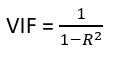

So, the closer the R^2 value to 1, the higher the value of VIF and the higher the multicollinearity with the particular independent variable.


In [160]:
# Importing necessary libraries
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Convert columns to numeric, excluding 'rented_bike_count'
numeric_cols = bike_df.drop(columns='rented_bike_count').apply(pd.to_numeric, errors='coerce')

# Remove columns with all missing values
numeric_cols = numeric_cols.dropna(axis=1, how='all')

# Remove rows with missing values
numeric_cols.dropna(inplace=True)

# Creating a function to calculate the variance inflation factor (VIF)
def calc_vif(X):
  vif = pd.DataFrame()
  vif["Columns"] = X.columns
  vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
  return vif

# Calculating the VIF for independent columns
calc_vif(numeric_cols)

,Columns,VIF
0,hour,1.180963
1,temp,4.439501
2,humidity,2.060226
3,wind_speed,1.238077
4,visibility,1.631772
5,solar_radiation,1.271047
6,rainfall,NaN
7,snowfall,NaN
8,holiday,NaN
9,func_day,1.080839


We can see that the seasons encoding have very high VIF therefore we will eliminate one of the columns. We will drop winter because it has the lowest bikes rented. The columns Rainfall , Snowfall , holiday have no VIF at all so we will drop them too.

In [161]:
#Dropping the Unnecessary columns
bike_df.drop(columns={'Winter' , 'rainfall','snowfall', 'holiday'},axis=1,inplace=True)

In [162]:
bike_df.columns

Index(['rented_bike_count', 'hour', 'temp', 'humidity', 'wind_speed',
       'visibility', 'solar_radiation', 'func_day', 'month',
       'weekdays_weekend', 'Spring', 'Summer', 'Autumn'],
      dtype='object')

In [163]:
# Convert columns to numeric, excluding 'rented_bike_count'
numeric_cols = bike_df.drop(columns='rented_bike_count').apply(pd.to_numeric, errors='coerce')

# Remove columns with all missing values
numeric_cols = numeric_cols.dropna(axis=1, how='all')

# Remove rows with missing values
numeric_cols.dropna(inplace=True)

# Creating a function to calculate the variance inflation factor (VIF)
def calc_vif(X):
  vif = pd.DataFrame()
  vif["Columns"] = X.columns
  vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
  return vif

# Calculating the VIF for independent columns
calc_vif(numeric_cols)

,Columns,VIF
0,hour,4.245601
1,temp,9.592826
2,humidity,11.218688
3,wind_speed,4.833473
4,visibility,7.444988
5,solar_radiation,1.654547
6,func_day,19.606252
7,month,7.993291
8,weekdays_weekend,1.397889
9,Spring,4.011959


As we can see that Functioning Day has a VIF>10 therefore we will remove it.

In [164]:
#Dropping the Functioning Day column
bike_df.drop(columns={'func_day'},axis=1,inplace=True)

In [165]:
# Convert columns to numeric, excluding 'rented_bike_count'
numeric_cols = bike_df.drop(columns='rented_bike_count').apply(pd.to_numeric, errors='coerce')

# Remove columns with all missing values
numeric_cols = numeric_cols.dropna(axis=1, how='all')

# Remove rows with missing values
numeric_cols.dropna(inplace=True)

# Creating a function to calculate the variance inflation factor (VIF)
def calc_vif(X):
  vif = pd.DataFrame()
  vif["Columns"] = X.columns
  vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
  return vif

# Calculating the VIF for independent columns
calc_vif(numeric_cols)

,Columns,VIF
0,hour,4.073385
1,temp,9.447010
2,humidity,6.959906
3,wind_speed,4.708487
4,visibility,5.551476
5,solar_radiation,1.605271
6,month,7.795210
7,weekdays_weekend,1.378384
8,Spring,3.945172
9,Summer,9.061466


As we can see that we don't have any variable with VIF>10 we can move ahead.

## **Pre-Processing Of data**

First we will create different datasets for Independent variable and dependent variable.

In [166]:
#Creating the dataset for independent and dependent variables
X = bike_df.drop(columns={'rented_bike_count'},axis=1)
Y = bike_df['rented_bike_count']

In [167]:
#First look of the independent variable dataset
X.head()

,hour,temp,humidity,wind_speed,visibility,solar_radiation,month,weekdays_weekend,Spring,Summer,Autumn
0,0,-5.2,37,2.2,2000,0.0,12,0,0,0,0
1,1,-5.5,38,0.8,2000,0.0,12,0,0,0,0
2,2,-6.0,39,1.0,2000,0.0,12,0,0,0,0
3,3,-6.2,40,0.9,2000,0.0,12,0,0,0,0
4,4,-6.0,36,2.3,2000,0.0,12,0,0,0,0


In [168]:
#First look of the dependent variable dataset
Y.head()

0    254
1    204
2    173
3    107
4     78
Name: rented_bike_count, dtype: int64

##**Target Feature Conditioning**

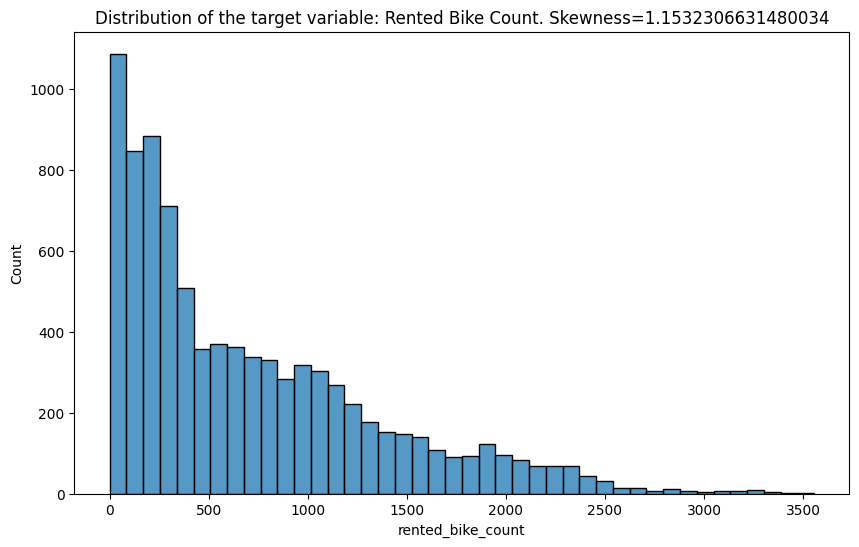

In [169]:
#Checking for the distribution of the Target variable
from scipy.stats import skew
plt.figure(figsize=(10,6))
plt.title("Distribution of the target variable: Rented Bike Count. Skewness="+str(skew(bike_df['rented_bike_count'])))
sns.histplot(data=bike_df,x='rented_bike_count')
plt.show()

The distribution of the target feature is observed and in this case it is a positively skewed distribution so it will be normalised using square root transformation.

In [170]:
#Applying square root transformation on the dependent variable
Y = np.sqrt(Y)

#Creating a dataframe with values of Y for visualisation purpose
visualize_Y = Y.reset_index()

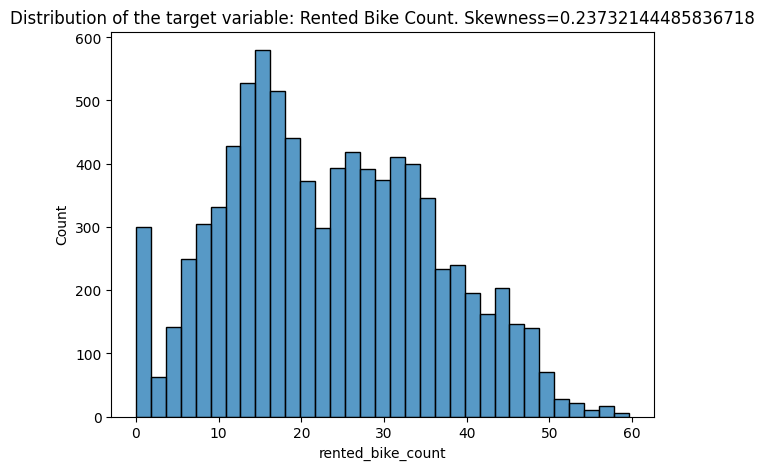

In [171]:
#Checking how well the square root transformation has worked
plt.figure(figsize=(7,5))
plt.title("Distribution of the target variable: Rented Bike Count. Skewness="+str(skew(visualize_Y['rented_bike_count'])))
sns.histplot(data=visualize_Y,x='rented_bike_count')
plt.show()

From the above plot we can say that the target variable has been normalized and we are good to go further.

### **Data Splitting**

In [172]:
# Split the data into train and test.
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=0)

In [173]:
#Shape of the train set of the independent values
X_train.shape

(6570, 11)

In [174]:
#Shape of the test set of the independent values
X_test.shape

(2190, 11)

##### What data splitting ratio have you used and why?

Before, fitting any model it is a rule of thumb to split the dataset into a training and test set. This means some proportions of the data will go into training the model and some portion will be used to evaluate how our model is performing on any unseen data. The proportions may vary from 60:40, 70:30, 75:25 depending on the person but mostly used is 80:20 for training and testing respectively. In this step we will split our data into training and testing set using scikit learn library.

## **Feature Scaling**

Feature Scaling is a technique to standardize the independent features present in the data in a fixed range. It is performed during the data pre-processing to handle highly varying magnitudes or values or units. If feature scaling is not done, then a machine learning algorithm tends to weigh greater values, higher and consider smaller values as the lower values, regardless of the unit of the values.

Two ways of feature scaling:

1. Min max normalization

2. Standardisation

In this project I'm going to use the standardisation method with the help of the StandardScaler() function.

In [175]:
#Creating object for the StandardScaler function
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [176]:
#Standardizing the independent variables
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [177]:
#Overview of what a dataframe looks like after standardizing
X_train

array([[ 1.66765533, -0.74954694,  1.22697808, ..., -0.5807482 ,
        -0.57582707,  1.72819284],
       [ 0.36544652,  0.93615918, -0.54181953, ...,  1.72191666,
        -0.57582707, -0.57863913],
       [ 1.08889586, -1.65916064, -1.22968527, ..., -0.5807482 ,
        -0.57582707, -0.57863913],
       ...,
       [-0.06862308,  1.06133538, -0.05048686, ..., -0.5807482 ,
         1.73663249, -0.57863913],
       [-1.66021162, -0.37401835,  0.04777967, ...,  1.72191666,
        -0.57582707, -0.57863913],
       [ 1.23358573, -0.47415931,  1.22697808, ...,  1.72191666,
        -0.57582707, -0.57863913]])

# **6. Model Implementation**

Machine learning models can be described as programs that are trained to find patterns or trends within data and predict the result for new data.

In this project we are dealing with a regression problem, therefore we will be using regression models. Some popular examples are Linear Regression and polynomial regression.

In this project we will be include the following models:
1. Linear Regression.
2. Lasso Regression (Linear regression with L1 regularization).
3. Ridge Regression (Linear regression with L2 regularization).
4. Random Forest Regression.

### **Linear Regression**

Linear Regression is fundamental machine learning algorithm, which is used for predicting numerical values based on input features. Linear regression performs the task to predict a dependent variable value (y) based on a given independent variable value (x). So, this regression technique finds out a linear relationship between x (input) and y(output)

In [178]:
#Training the linear regression model
linear_model = LinearRegression().fit(X_train,Y_train)

In [179]:
#Checking the score of the linear regression model
linear_model.score(X_train,Y_train)

0.4810504838283465

In [180]:
#Checking the coefficient values of the linear regression model
linear_model.coef_

array([ 3.50492658e+00,  4.26574235e+00, -3.32198665e+00, -1.10222929e-03,
        1.58758486e-01,  1.72770695e-01,  5.73100662e-01, -4.04464655e-01,
        2.72123166e+00,  3.32246650e+00,  2.54800807e+00])

In [181]:
#Predicting the value of the dependent variable for train and test dataset
Y_train_pred_linear = linear_model.predict(X_train)
Y_test_pred_linear = linear_model.predict(X_test)

In [182]:
#Creating a function to plot the comparison between actual values and predictions
def plot_comparison(y_pred,model):
   plt.figure(figsize=(10,7))
   plt.title("The comparison of actual values and predictions obtained by "+model)
   plt.plot(np.array((Y_test)))
   plt.plot((y_pred),color='yellow')
   plt.legend(["Actual","Predicted"])
   plt.show()

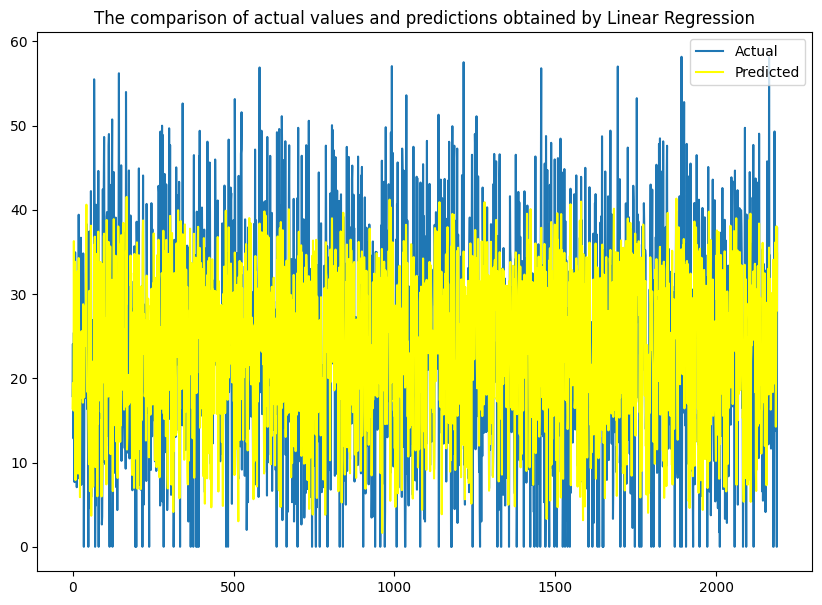

In [183]:
#Plotting the comparison between actual and predicted values obtained by Linear Regression
plot_comparison(Y_test_pred_linear,'Linear Regression')

In [184]:
#Creating a function to calculate and display the evaluation metrics for the model
def eval_metrics(y_pred,model):
  print("The evaluation metrics for "+model+" are given as:")

#Mean squared error for test set
  MSE  = mean_squared_error(Y_test,y_pred)
  print("MSE :" , MSE)

#Root of Mean squared error
  RMSE = np.sqrt(MSE)
  print("RMSE :" ,RMSE)

#Mean Absolute Error
  MAE= mean_absolute_error(Y_test, y_pred)
  print("MAE :",MAE)


 #r2 score for prediction on test set
  r2_test = r2_score(Y_test,y_pred)
  print("R2 :" ,r2_test)

 #adjusted r2 score for test set
  a_r2_test = 1-(1-r2_score(Y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
  print("Adjusted R2 :",a_r2_test)

In [185]:
#Calculating the evaluation metrics for Linear Regression
eval_metrics(Y_test_pred_linear,'Linear Regression')

The evaluation metrics for Linear Regression are given as:
MSE : 85.92048676741851
RMSE : 9.269330437923687
MAE : 6.788271118079312
R2 : 0.4560837940980107
Adjusted R2 : 0.45333674255305123


### **Lasso Regression**

Lasso regression analysis is a shrinkage and variable selection method for linear regression models. The goal of lasso regression is to obtain the subset of predictors that minimizes prediction error for a quantitative response variable. It uses the Linear regression model with L1 regularization.

In [186]:
#Creating a Lasso regression model using GridSearchCV
lasso = Lasso()
parameters = {'alpha': [0.8,1,10,20,40,80,100,300,700,1000]}
lasso_model_grid = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_model_grid.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.8, 1, 10, 20, 40, 80, 100, 300, 700,
                                   1000]},
             scoring='neg_mean_squared_error')

In [187]:
#Getting the best parameters for Lasso regression fetched through GridSearchCV
print(f'The best value for alpha in lasso regression through GridSearchCV is found to be {lasso_model_grid.best_params_}')
print(f'\nUsing {lasso_model_grid.best_params_} as the value for alpha gives us a negative mean squared error of: {lasso_model_grid.best_score_}')

The best value for alpha in lasso regression through GridSearchCV is found to be {'alpha': 0.8}

Using {'alpha': 0.8} as the value for alpha gives us a negative mean squared error of: -85.06446829724493


In [188]:
#Fitting the Ridge regression model on the dataset with appropriate alpha value
lasso_model=Lasso(alpha=0.8).fit(X_train,Y_train)

#Predicting values of the independent variable on the test set
Y_test_pred_lasso = lasso_model.predict(X_test)

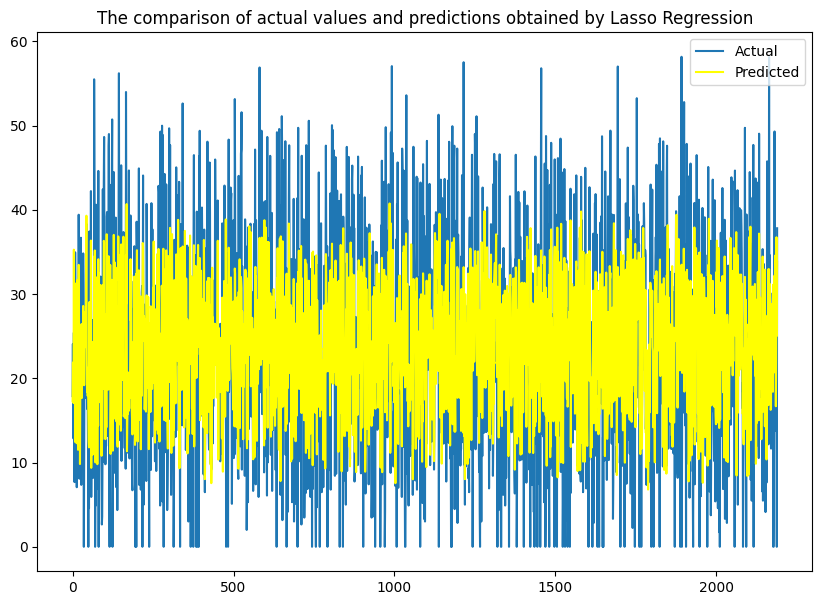

In [189]:
#Plotting the comparison between actual and predicted values obtained by Lasso Regression
plot_comparison(Y_test_pred_lasso,'Lasso Regression')

In [190]:
#Calculating the evaluation metrics for Lasso Regression
eval_metrics(Y_test_pred_lasso,'Lasso Regression')

The evaluation metrics for Lasso Regression are given as:
MSE : 90.75026665941712
RMSE : 9.526293437608203
MAE : 7.176221215749698
R2 : 0.42550906561318824
Adjusted R2 : 0.42260759624759836


The model quality has depreciated by using the lasso regression method.

### **Ridge Regression**

Ridge regression is a method of estimating the coefficients of regression models in scenarios where the independent variables are highly correlated. It uses the linear regression model with the L2 regularization method.

In [191]:
#Training the ridge regression model using GridSearchCV
ridge = Ridge()
parameters = {'alpha': [1,0.001,10,20,35,60,70,100,800,1200]}
ridge_model_grid = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_model_grid.fit(X_train,Y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1, 0.001, 10, 20, 35, 60, 70, 100, 800,
                                   1200]},
             scoring='neg_mean_squared_error')

In [192]:
#Getting the best parameters for Ridge regression fetched through GridSearchCV
print(f'The best value for alpha in ridge regression through GridSearchCV is found to be {ridge_model_grid.best_params_}')
print(f'\nUsing {ridge_model_grid.best_params_} as the value for alpha gives us a negative mean squared error of: {ridge_model_grid.best_score_}')

The best value for alpha in ridge regression through GridSearchCV is found to be {'alpha': 20}

Using {'alpha': 20} as the value for alpha gives us a negative mean squared error of: -80.17591141694155


In [193]:
#Fitting the Ridge regression model on the dataset with appropriate alpha value
ridge_model=Ridge(alpha=20).fit(X_train,Y_train)

#Predicting values of the independent variable on the test set
Y_test_pred_ridge = ridge_model.predict(X_test)

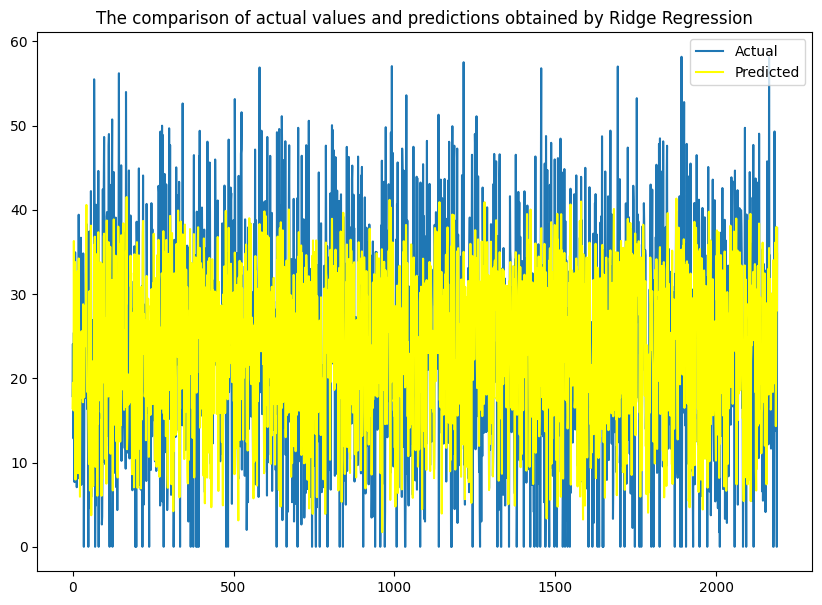

In [194]:
#Plotting the comparison between actual and predicted values obtained by Ridge Regression
plot_comparison(Y_test_pred_ridge,'Ridge Regression')

In [195]:
#Calculating the evaluation metrics for Ridge Regression
eval_metrics(Y_test_pred_ridge,'Ridge Regression')

The evaluation metrics for Ridge Regression are given as:
MSE : 85.9161864683753
RMSE : 9.269098471176973
MAE : 6.787403681882704
R2 : 0.4561110169691538
Adjusted R2 : 0.45336410291344253


As we can see there is only a very slight difference between the results achieved through Linear regression and Ridge regression.

# **Random Forest Regression**

A random forest is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

In [196]:
#Creating a Random Forest Regression model using GridSearchCV
rand_forest = RandomForestRegressor()


parameters = {'n_estimators' : [int(x) for x in np.linspace(start=10,stop=20, num=5)],
             'max_depth' : [10,15,20],
             'min_samples_split':[2,4],
             'min_samples_leaf':[1,2],
             'bootstrap' : [True,False]
             }

rf_model_grid = GridSearchCV(rand_forest,parameters,scoring='r2',cv=5)
rf_model_grid.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True, False], 'max_depth': [10, 15, 20],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 4],
                         'n_estimators': [10, 12, 15, 17, 20]},
             scoring='r2')

In [197]:
#Getting the best parameters for Random Forest regression fetched through GridSearchCV
print(f'The best value for parameters in random forest regression through GridSearchCV is found to be {rf_model_grid.best_params_}')
print(f'\nUsing {rf_model_grid.best_params_} as the value for the parameters in random forest model, it gives us a negative mean squared error of: {rf_model_grid.best_score_}')

The best value for parameters in random forest regression through GridSearchCV is found to be {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 20}

Using {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 20} as the value for the parameters in random forest model, it gives us a negative mean squared error of: 0.748486889802433


In [198]:
#Fitting Random Forest model on the dataset with appropriate paramter values
rf_model = RandomForestRegressor(bootstrap=True,max_depth=20,min_samples_leaf=2,min_samples_split=4,n_estimators=15).fit(X_train,Y_train)

#Predicting values of the independent variable on the test set
Y_test_pred_rf = rf_model.predict(X_test)

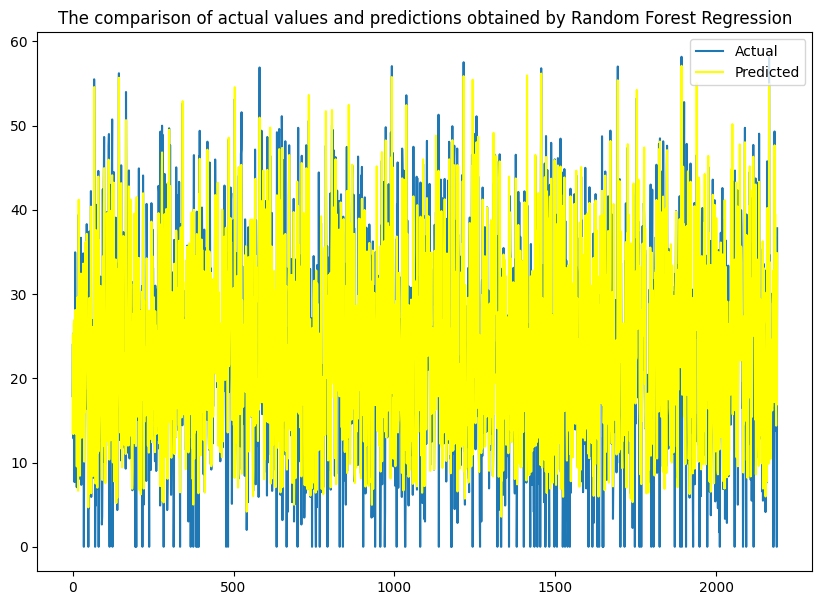

In [199]:
#Plotting the comparison between actual and predicted values obtained by Random Forest Regression
plot_comparison(Y_test_pred_rf,'Random Forest Regression')

In [200]:
#Calculating the evaluation metrics for Random Forest Regression
eval_metrics(Y_test_pred_rf,'Random Forest Regression')

The evaluation metrics for Random Forest Regression are given as:
MSE : 48.14318292456024
RMSE : 6.9385288732237935
MAE : 3.805241223045413
R2 : 0.6952315055284107
Adjusted R2 : 0.6936922707078472


As we can see the quality of model prediction has drastically improved.


# **7. Model Explainability**

Model explainability refers to the concept of being able to understand the machine learning model. For example – If a healthcare model is predicting whether a patient is suffering from a particular disease or not. The medical practitioners need to know what parameters the model is taking into account or if the model contains any bias. So, it is necessary that once the model is deployed in the real world. Then, the model developers can explain the model.

Popular techniques for model explainability:
1. LIME
2. SHAP
3. ELI-5

In this project I am using SHAP for model explainability. Among the various methods in SHAP I'll be using the SHAP summary plot, which plots features/columns in order of their impact on the predictions and also plots the SHAP values.

In [201]:
#Installing the shap library
!pip install shap

In [202]:
#imporing SHAP
import shap

In [203]:
#Creating a function to plot the shap summary plot
def shap_summary(model):
   explainer_shap = shap.Explainer(model=model, masker=X_train)
   shap_values = explainer_shap.shap_values(X_train)
   shap.summary_plot(shap_values,X_train,feature_names=X.columns)

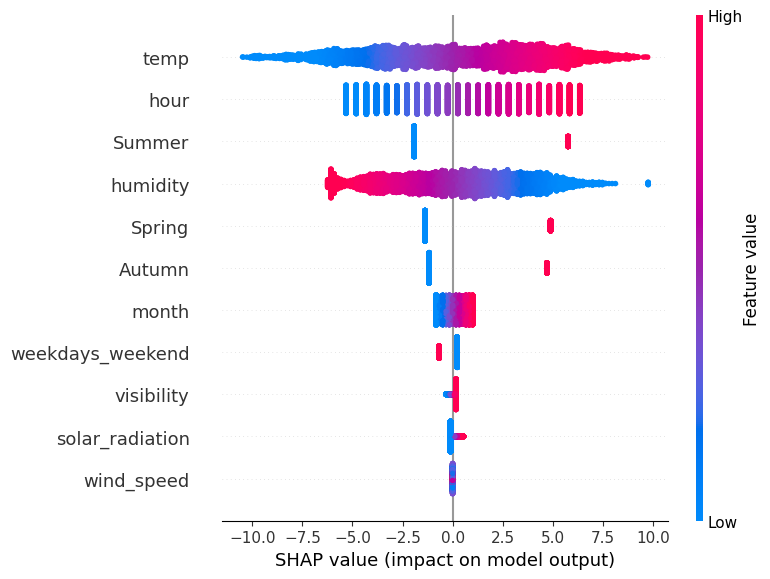

In [204]:
#Plotting shap summary plot for linear regression
shap_summary(linear_model)

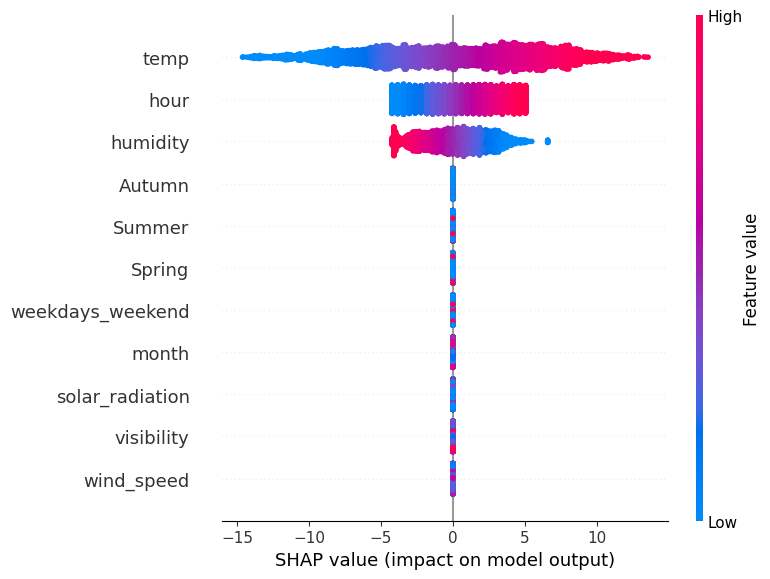

In [205]:
#Plotting shap summary plot for Ridge regression
shap_summary(lasso_model)

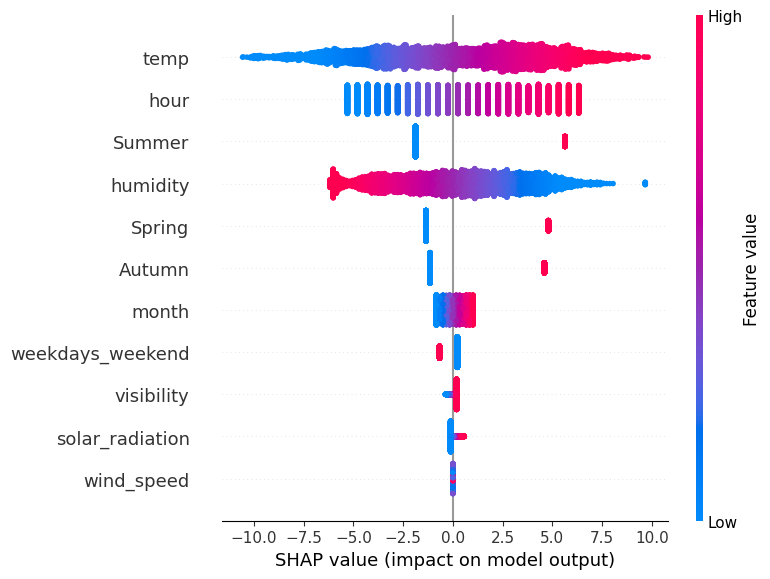

In [206]:
#Plotting shap summary plot for Ridge regression
shap_summary(ridge_model)

 98%|===================| 6467/6570 [01:03<00:01]       

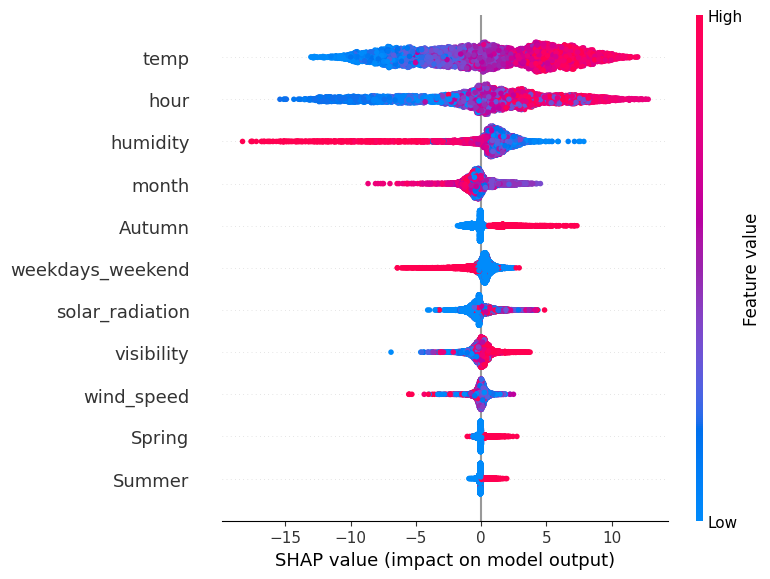

In [207]:
#Plotting shap summary plot for Random forest regression model
explainer_shap = shap.Explainer(model=rf_model, masker=X_train)
shap_values = explainer_shap.shap_values(X_train,check_additivity=False)
shap.summary_plot(shap_values,X_train,feature_names=X.columns)

We can see that different importance or impact power is given to the features by each model and that defines how well the model performs on prediction. Random forest gives almost all the features a significant impact power and therefore it performs the best out of all the 4 models.

By looking at the SHAP summary plot for each model, we can figure out the feature importance and also its impact power by understanding the SHAP values.

# **Conclusion**


1. **EDA insights:**
  * Most number of bikes were rented in the Summer season and the lowest in the winter season.
  * Over 96% of the bikes are rented on week days that are considered as No Holiday.
  * Most number of bikes are rented in the temperature range of 15 degrees to 25 degrees.
  * Most number of bikes are rented when there is no snowfall or rainfall.
  * Majority of the bikes are rented for a humidity percentage range of 30 to 70.
  * The highest number of bike rentals have been done in between 7-9 AM in the morning and 6-8 PM in the evening.
  * Most of the bike rentals have been made when there is high visibility.

2. **Results from ML models:**
  * Random Forest Regression is the best performing model with an r2 score of 0.6965.
  * Lasso Regression(L1 regularization) is the worst performing model with an r2 score of 0.4255.
  * Actual vs Prediction visualisation is done for all the 4 models.
  * All 4 models have been explained with the help of SHAP library.
  * Temperature, Hour and Humidity are the most important factors according to all the models.

3. **Challenges faced:**
  * Removing Outliers.
  * Encoding the categorical columns.
  * Removing Multicollinearity from the dataset.
  * Choosing Model explainability technique.

Although the current analysis may be insightful, it is important to note that the dataset is time-dependent and variables such as temperature, windspeed and solar radiation may not always remain consistent. As a result there may be situations where the model fails to perform well. As field of machine learning is constantly evolving, it is necessary to stay up-to-date with the latest developments and be prepared to handle unexpected scenarios. Maintaining a strong understanding of Machine Learning concepts will undoubtely provide an advantage in staying ahead in the future.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***